<a href="https://colab.research.google.com/github/umarranginwala/Internship-The-Sparks-Foundation/blob/main/Task_1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Sparks Foundation || GRIP JUNE 2021

### Author: Umar Ranginwala (Data Science and Business Analytics)

## Task 1 Prediction using Supervised ML

##Problem Statement:

#### 1. Predict the percentage of an student based on the no. of study hours. 
#### 2. What will be predicted score if a student studies for 9.25 hrs/ day?

## Importing Relevent Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *

## Loading Data Set

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


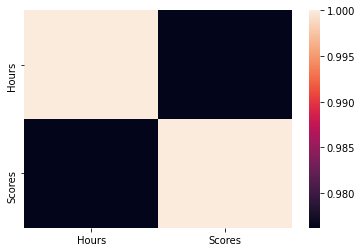

In [6]:
# Plotting correlation heatmap
sns.heatmap(data.corr())

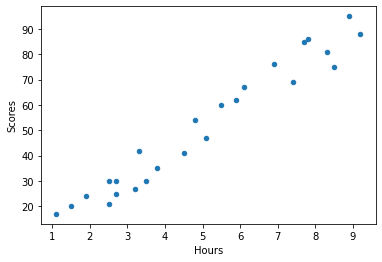

In [7]:
# Plotting scatter diagram for Independent and Dependent Variable
data.plot.scatter(x="Hours",y="Scores")

##### A Linear Relationship can be identified in the number of hours of study and the percentage obtained by the student

### SIMPLE LINEAR REGRESSION MODEL

In [8]:
# Relevent Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Segregating Dependent and Independent variables

In [9]:
X = data[["Hours"]]
y = data["Scores"]

### Creating Training & Testing Set 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=60)

### Model Fitting

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)
print(f'Coefficient: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficient: [9.69103963]
Intercept: 3.105461262328788


### Making Prediction

In [13]:
y_pred = y_pred=lr.predict(X_test)
result = pd.DataFrame({'Hours': X_test.iloc[:,0], 'Actual Score': y_test, 'Predicted Score': y_pred.round(0)})

In [14]:
result

,Hours,Actual Score,Predicted Score
14,1.1,17,14.0
20,2.7,30,29.0
11,5.9,62,60.0
0,2.5,21,27.0
9,2.7,25,29.0


### Model Evaluation

In [15]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred).round(0)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred).round(0)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred).round(4)}')

Mean Absolute Error(MAE): 3.0
Residual Sum of Squares(MSE): 14.0
R2-Score: 0.9441


### Q. What will be predicted score if a student studies for 9.25 hrs/ day?

In [16]:
hours = 9.25
score = lr.predict([[hours]]).astype(int)
print(score)

[92]


### If a student studies for 9.25 hrs/day, the Score will be 93 as per this model.


In [17]:
results = []
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.09,random_state=i)
  lr = LinearRegression()
  lr.fit(X_train,y_train)
  y_pred=lr.predict(X_test)
  q=(mean_absolute_error(y_test,y_pred),i)
  results.append(q)

In [18]:
min(results)

(2.6381995739618844, 82)

In [19]:
results = []
for i in range(1,90):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=i/100,random_state=60)
  lr = LinearRegression()
  lr.fit(X_train,y_train)
  y_pred=lr.predict(X_test)
  q=(mean_absolute_error(y_test,y_pred),i)
  results.append(q)

In [20]:
min(results)

(2.8153996074162992, 9)